In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH',
    'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG', 'JD', 'LRCX', 'LSPD',
    'LULU', 'MDB', 'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR', 'NVDA',
    'ODFL', 'OKTA', 'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON',
    'PYPL', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU',
    'RVLV', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX',
    'TSCO', 'TSLA', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'TYL', 'UPST',
    'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AMEH', 'AMRK', 'APT', 'CENN', 'CTGO', 'CUBE',
    'DTST', 'EP', 'FCPT', 'FCUV', 'FKWL', 'GGE', 'GME', 
    'INTZ', 'KREF', 'LFMD', 'MCVT', 'MIY', 'MNMD', 'MOBQ',
    'PETV', 'POWW', 'PRPH', 'RVYL', 'VIRT', 'WAVD', 'WKHS',
    'ZYXI']
BEST_WEIGHTED = [
    'BTTR', 'BYRN', 'CEF', 'CGAU', 'CIZN', 'DYAI', 'HMY', 'HNRG',
    'IEI', 'MGF', 'MICS', 'MMU', 'MUE', 'NAN', 'NOM', 'NXN', 'NXP',
    'OMQS', 'RVP', 'SOBR']

INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

78

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-10-29', datetime.date(2022, 10, 29))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  129 of 129 completed
Generating derived columns...
AAPL... ABMD... ABNB... ACN... ADBE... ADYEY... AMD... AMEH... AMGN... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BTTR... BYND... BYRN... CEF... CENN... CGAU... CHWY... CIZN... CRWD... CTGO... CUBE... DDOG... DOCS... DOCU... DTST... DUOL... DYAI... EDIT... EP... ETSY... FCPT... FCUV... FKWL... FLGT... GGE... GH... GME... GMED... GOOG... HMY... HNRG... IDXX... IEI... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MCVT... MDB... MELI... MGF... MICS... MIY... MMU... MNMD... MNST... MOBQ... MSFT... MTCH... MUE... NAN... NOM... NVCR... NVDA... NXN... NXP... ODFL... OKTA... OMQS... OPEN... PAC... PANW... PAYC... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RGEN... RIVN... RMD... ROKU... RVLV... RVP... RVYL... SE... SHOP... SNOW... SOBR... TASK... TDOC... TEAM... TREX... TSCO... TSLA... TTD... TTWO... TWLO... TWTR... TYL... UPST..

In [5]:
data['Date'].tail()

2512   2022-10-24
2513   2022-10-25
2514   2022-10-26
2515   2022-10-27
2516   2022-10-28
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.010926
2       0.990621
3       1.002164
4       1.007853
5       0.976295
          ...   
2512    1.011882
2513    1.016267
2514    0.992612
2515    0.993917
2516    1.024626
Name: ^GSPC, Length: 2516, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.030103
2,1.000000
3,1.008707
4,1.010662
5,1.000000
...,...
2512,1.015071
2513,1.054348
2514,1.014984
2515,1.007574


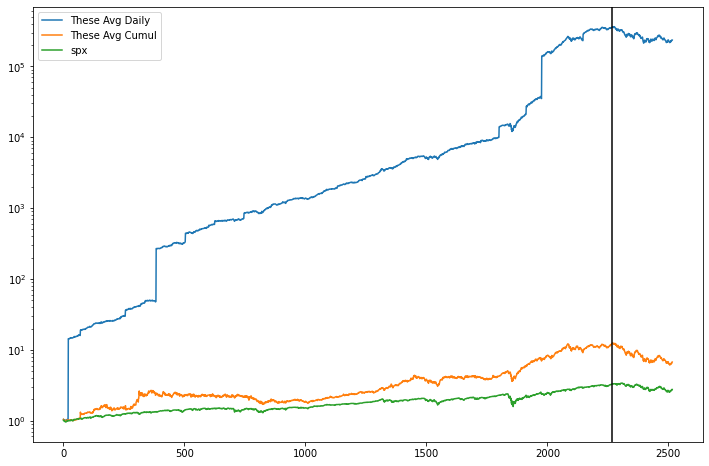

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-10-31,NaN,NaN
1,2012-11-01,1.045694,1.045694
2,2012-11-02,1.034432,1.037234
3,2012-11-05,1.031631,1.025875
4,2012-11-06,1.030306,1.022833


In [10]:
out.tail()

,Date,mine1,mine2
2512,2022-10-24,225057.172188,6.334818
2513,2022-10-25,233298.411100,6.544109
2514,2022-10-26,233074.009167,6.515542
2515,2022-10-27,232669.055784,6.547836
2516,2022-10-28,235513.139293,6.737129


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

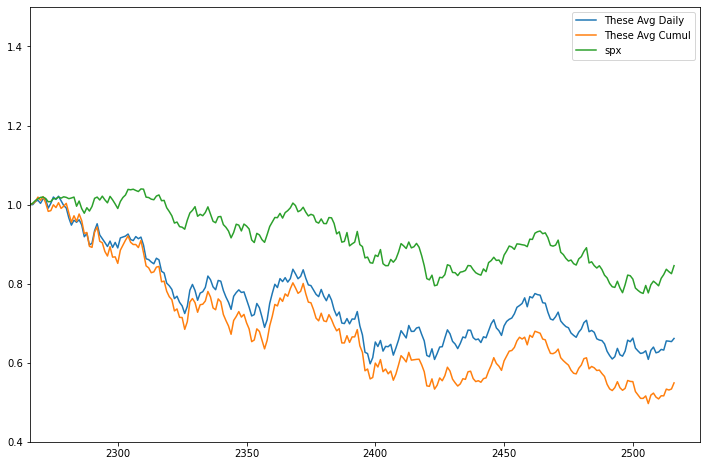

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2457,87.570000,87.570000,89.550003,83.900002,84.629997,4.472438,1.034739,1.007015,0.973206
2458,85.540001,85.540001,89.629997,84.800003,88.080002,4.448984,0.971163,0.976819,1.005824
2459,83.529999,83.529999,85.400002,82.070000,84.510002,4.425206,0.988404,0.976502,0.987959
2460,87.279999,87.279999,87.900002,84.500000,86.989998,4.469121,1.003334,1.044894,1.041422
2461,88.580002,88.580002,93.699997,87.959999,89.449997,4.483906,0.990274,1.014895,1.024862


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2457,87.570000,87.570000,89.550003,83.900002
2458,85.540001,85.540001,89.629997,84.800003
2459,83.529999,83.529999,85.400002,82.070000
2460,87.279999,87.279999,87.900002,84.500000
2461,88.580002,88.580002,93.699997,87.959999


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2457,87.570000,87.570000,89.550003,83.900002,89.629997,84.800003,1.023524,0.968368
2458,85.540001,85.540001,89.629997,84.800003,85.400002,82.070000,0.998363,0.959434
2459,83.529999,83.529999,85.400002,82.070000,87.900002,84.500000,1.052317,1.011613
2460,87.279999,87.279999,87.900002,84.500000,93.699997,87.959999,1.073556,1.007791
2461,88.580002,88.580002,93.699997,87.959999,89.019997,86.260002,1.004967,0.973809


0.05    0.972027
Name: HighMult, dtype: float64


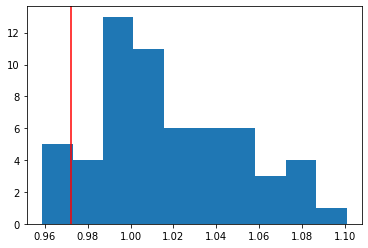

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0154226539502678


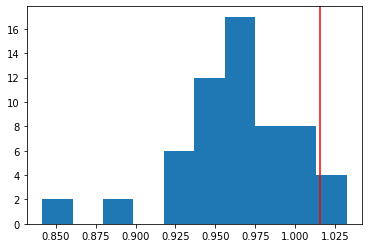

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0154226539502678, 0.9720266298930161)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0123083472004724, 0.9896874903139407)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2457,87.570000,87.570000,89.550003,83.900002,89.629997,84.800003,1.023524,0.968368,0
2458,85.540001,85.540001,89.629997,84.800003,85.400002,82.070000,0.998363,0.959434,0
2459,83.529999,83.529999,85.400002,82.070000,87.900002,84.500000,1.052317,1.011613,0
2460,87.279999,87.279999,87.900002,84.500000,93.699997,87.959999,1.073556,1.007791,1
2461,88.580002,88.580002,93.699997,87.959999,89.019997,86.260002,1.004967,0.973809,1


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0089116871348736, 0.9654714067905995, 1.015422653950268, 0.9772781232521854)

In [27]:
get_hilo_mults(aapl)

(1.007729529071998, 0.9891210248236924, 1.01226414179611, 0.991685189035051)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.007730,0.989121,1.012264,0.991685
1,ABMD,1.008222,0.995668,1.002206,0.990707
2,ABNB,1.008533,0.982080,1.016648,0.995107
3,ACN,1.001978,0.992380,1.009635,0.991782
4,ADBE,1.003774,0.984294,1.016059,0.984304


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,155.740005,AAPL
ABMD,258.059998,ABMD
ABNB,115.209999,ABNB
ACN,287.779999,ACN
ADBE,325.679993,ADBE
...,...,...
ZM,84.209999,ZM
ZYXI,10.52,ZYXI
^GSPC,3901.060059,^GSPC
^IXIC,11102.452148,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.007730,0.989121,1.012264,0.991685,155.740005
1,ABMD,1.008222,0.995668,1.002206,0.990707,258.059998
2,ABNB,1.008533,0.982080,1.016648,0.995107,115.209999
3,ACN,1.001978,0.992380,1.009635,0.991782,287.779999
4,ADBE,1.003774,0.984294,1.016059,0.984304,325.679993


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv